## Arrhenius equations
The code below can be used to estimate the conductivity of the mineral assemblages at the given temperatures. 

In [1]:
# Importing necessary libraries

import numpy as np;
import matplotlib.pyplot as maps;
import math;

Firtly, let's determine the conductivity of any mantle mineral (olivine, orthopyroxene, clinopyroxene and garnet) at a particular temperature. The function uses the solid-state Arrhenius equation as describe by Ledo and Jones (2005) and the constants mentioned from Xu et al (2000a).

I'll add the equations here later on...

In [19]:
# function to determine the conductivity of any particular mineral (and not a mixture)

def cond(mineral, T, Xfe=0):
    """
    mineral= 'ol' or 'opx' or 'cpx' or 'grt'
    T= Temperature in deg C
    Xfe= XFe (used for garnet only)
    'ol'= olivine
    'opx'= orthopyroxene
    'cpx'= clinopyroxene
    'grt'= garnet
    """
    kb= 8.61734279*10**-5;
    A= 0;
    E= 0;
    if mineral== 'ol':
        A= 2.402;
        E= 1.6;
    elif mineral== 'opx':
        A= 3.72;
        E= 1.80;
    elif mineral== 'cpx':
        A= 3.25;
        E= 1.87;
    elif mineral== 'grt':
        A= 4.26-12.26*Xfe;
        E= 2.40-6*Xfe;
    
    T= T+273.15;
    c= (10**A)* math.exp(-E/kb/T);
    return c;

Now that we have the conductivity of each mineral determined, it's time to mix them up. The next code block determines the conductivity at the upper and lower Hashin-Shtrikman (HS) bounds. These two bounds refer to the mineral assemblage when the most conducting mineral is the background rock matrix (upper HS bound) and the least conducting mineral is the rock matrix (lower HS bound).

In [20]:
# function to determine the HS bounds

def HS(v,c, bound):
    """
    v= array of volume fractions of minerals
    c= array of conductivity of minerals
    bound= 'upper' or 'lower'
    """
    s= 0;
    if bound== 'lower':
        s= np.min(c);
    else:
        s= np.max(c);
    
    s_HS= 1/np.sum(v/(c+2*s))- 2*s;
    return s_HS;

Let us see how conductivity varies as we increase the temperature from 800 deg C to 1400 deg C. We shall use the volume fractions as computed by Abraham et al, 2001 as mentioned in Ledo and Jones, 2005.
* Ol= 80%
* Opx= 18%
* Cpx= 2%

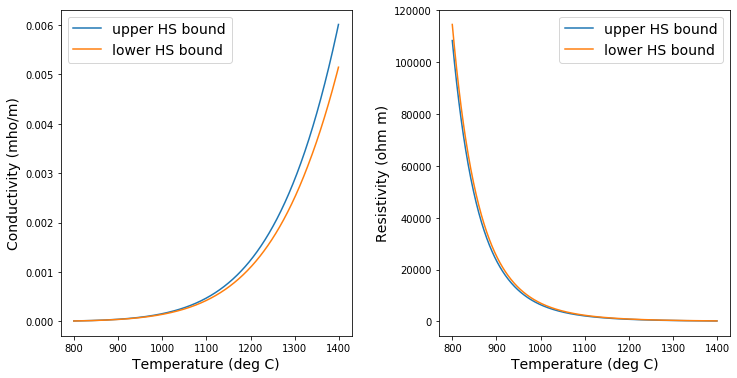

In [34]:
# Initialising the arrays requird

minerals= np.array(['ol', 'opx', 'cpx']); # minerals in mantle
vol= np.array([80, 18, 2])/100; # vol fractions of minerals

T_l= 800; # lower Temperature bound
T_u= 1400; # upper Temperature bound
T= range(T_l, T_u);

# Determine the conductivity
HS_u= [];
HS_l= [];
for t in T:
    c= [cond(m,t,) for m in minerals]; # get the corresponding conductivity for each mineral at temp T
    HS_u.append(HS(vol, c, 'upper'));
    HS_l.append(HS(vol, c, 'lower'));

HS_u= np.array(HS_u);
HS_l= np.array(HS_l);

fig, ax= maps.subplots(1,2, figsize= (12,6));

ax[0].plot(T, HS_u, label= 'upper HS bound');
ax[0].plot(T, HS_l, label= 'lower HS bound');
ax[0].set_xlabel('Temperature (deg C)', fontsize= 14)
ax[0].set_ylabel('Conductivity (mho/m)', fontsize= 14)
ax[0].legend(fontsize= 14);

ax[1].plot(T, 1/HS_u, label= 'upper HS bound');
ax[1].plot(T, 1/HS_l, label= 'lower HS bound');
ax[1].set_xlabel('Temperature (deg C)', fontsize= 14)
ax[1].set_ylabel('Resistivity (ohm m)', fontsize= 14)
ax[1].legend(fontsize= 14);

maps.subplots_adjust(wspace= 0.3);

Let's see how that looks on a log scale for conductivity

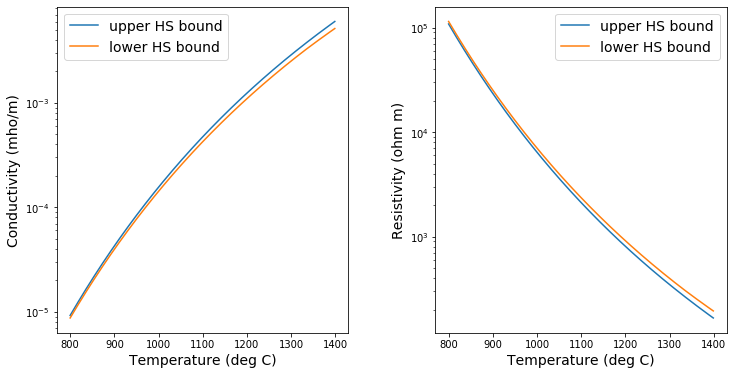

In [33]:
# Initialising the arrays requird

minerals= np.array(['ol', 'opx', 'cpx']); # minerals in mantle
vol= np.array([80, 18, 2])/100; # vol fractions of minerals

T_l= 800; # lower Temperature bound
T_u= 1400; # upper Temperature bound
T= range(T_l, T_u);

# Determine the conductivity
HS_u= [];
HS_l= [];
for t in T:
    c= [cond(m,t,) for m in minerals]; # get the corresponding conductivity for each mineral at temp T
    HS_u.append(HS(vol, c, 'upper'));
    HS_l.append(HS(vol, c, 'lower'));

HS_u= np.array(HS_u);
HS_l= np.array(HS_l);

fig, ax= maps.subplots(1,2, figsize= (12,6));

ax[0].semilogy(T, HS_u, label= 'upper HS bound');
ax[0].semilogy(T, HS_l, label= 'lower HS bound');
ax[0].set_xlabel('Temperature (deg C)', fontsize= 14)
ax[0].set_ylabel('Conductivity (mho/m)', fontsize= 14)
ax[0].legend(fontsize= 14);

ax[1].semilogy(T, 1/HS_u, label= 'upper HS bound');
ax[1].semilogy(T, 1/HS_l, label= 'lower HS bound');
ax[1].set_xlabel('Temperature (deg C)', fontsize= 14)
ax[1].set_ylabel('Resistivity (ohm m)', fontsize= 14)
ax[1].legend(fontsize= 14);

maps.subplots_adjust(wspace= 0.3);